# Random Forest Classifier

The Random Forest Classifier (RFC) is a model made up of many decision trees. Rather than simply averaging the prediction of trees (which we could call a “forest”), the RFC uses two key concepts: 

(1) _Random sampling of training data when building trees._ When training, each tree learns from a random sample of the data points. The samples are drawn with replacement, known as bootstrapping, meaning that some samples will be used multiple times in a single tree. By training each tree on different samples, although each tree might have high variance with respect to a particular set of the training data, overall, the _entire forest_ will have lower variance but not at the cost of increasing bias. With the test set, predictions are made by averaging the predictions of each decision tree. This procedure of training each individual learner on different bootstrapped subsets of the data and then averaging the predictions is known as _bagging_.

(2) _Random subsets of features when splitting nodes_. Only a subset of all the features are considered for splitting each node in each decision tree. Generally this is set to 'sqrt'(n_features) for classification. So, with the current data with 15 features, this would be set to just under 4. 

#### The Random Forest Classifier performed the best out of all the models which were run. Specifically, the RFC model utilizing under-sampling, due to imbalanced data. 

#### _Below are three models_: 

#### 1. Baseline 

#### 2. Under-Sampled

#### 3. Under-Sampled with hyper-parameters tuned (FINAL)

## Install libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

## Read in the data

In [2]:
pd.set_option('display.max_columns', 50)
LLCP2 = pd.read_csv(r'C:\Users\Nick\Desktop\GitProjects\LLCP_Project\LLCP2.csv')
LLCP2.describe()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_RFDRHV5,_PACAT1,_RFHLTH,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
0,0.0,6.0,1.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,6.0,1.0,1.0,5.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,6.0,1.0,0.0,4.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,6.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,6.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0


# 1. Baseline RFC Model:

In [16]:
# Split data by features and target
X = LLCP2[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','_RFHLTH','_HCVU651','EMPLOY1',
           'VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH']].values

y = LLCP2['MENTHLTH2'].values

In [17]:
# Complete a 70/30 train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# describes info about train and test set 
print("Number of rows/columns in X_test dataset: ", X_test.shape) 
print("Number of rows/columns in y_test dataset: ", y_test.shape) 
print("Number of rows/columns in X_train dataset: ", X_train.shape) 
print("Number of rows/columns in y_train dataset: ", y_train.shape) 

Number of rows/columns in X_test dataset:  (135005, 15)
Number of rows/columns in y_test dataset:  (135005,)
Number of rows/columns in X_train dataset:  (315011, 15)
Number of rows/columns in y_train dataset:  (315011,)


In [25]:
# Default options for RFC
# class sklearn.ensemble.RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, 
    # min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, 
    # max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
    # oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None

    
# ---BASELINE MODEL---

RFC_baseline = RandomForestClassifier()
RFC_baseline.fit(X_train, y_train)
y_pred = RFC_baseline.predict(X_test)
probs = RFC_baseline.predict_proba(X_test)
probs = probs[:,1]

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


=== Confusion Matrix ===
[[82021 10269]
 [22306 20409]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.83     92290
         1.0       0.67      0.48      0.56     42715

   micro avg       0.76      0.76      0.76    135005
   macro avg       0.73      0.68      0.70    135005
weighted avg       0.75      0.76      0.75    135005



Accuracy: 0.7587126402725825
F1_score: 0.556156581690352
Recall_score: 0.47779468570759687
AUC score: 0.7610051768857555
[[82021 10269]
 [22306 20409]]
Sensitivity 0.47779468570759687
Specificity 0.888731173474916
Precision 0.6652650107568941


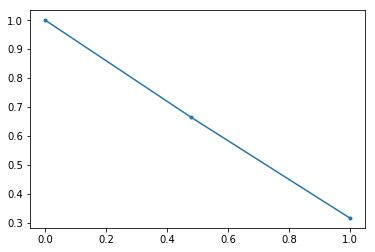

In [26]:
# ---CHECK ACCURACY---

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1_score:",metrics.f1_score(y_test, y_pred))
print("Recall_score:",metrics.recall_score(y_test, y_pred))
print("AUC score:",metrics.roc_auc_score(y_test, probs))
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(recall, precision, marker='.')
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

# True Positives
TP = confusion[1, 1]
# True Negatives
TN = confusion[0, 0]
# False Positives
FP = confusion[0, 1]
# False Negatives
FN = confusion[1, 0]
print("Sensitivity",TP / float(TP + FN))
print("Specificity",TN / float(TN + FP))
print("Precision",TP / float(TP + FP))

# Dealing with imbalanced data:

## The data is imbalanced, indicted by two things: 

### (1) MENTHLTH2 value counts show twice as many '0' than '1' rows

### (2) The accuracy scores in the baseline model for the '1' values are far lower than the '0', showing the model is biased. It's good at predicting 'Good Mental Health', but not 'Poor Mental Health'. I ran the Random Forest with class_weight option, giving 'Poor Mental Health' a higher weight. This improved scores a bit, but not by much.

### There are various re-sampling methods for dealing with unbalanced data. We will utilize the 'Under-Sampling' technique. This technique drops rows at random from the 'majority class', or the over-represented value. In this case, the '0' rows will be dropped at random until both value's are equal. This can lead to a loss of information, if there is not enough data. Since we have almost 500,000 total rows, this should not be a significant problem. I also tried adjusting class_weight in the baseline model and also used SMOTE-NC for Over-Sampling, however, the Under-Sampling provided the best results.

0.0    307337
1.0    142679
Name: MENTHLTH2, dtype: int64

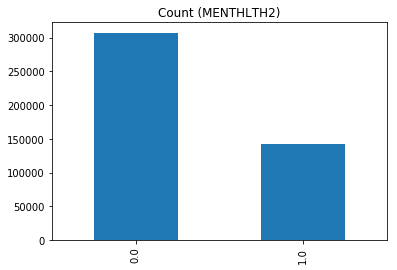

In [27]:
# Check value counts for each class of the target
LLCP2.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');
LLCP2['MENTHLTH2'].value_counts()

### There are roughly twice as many value counts for the target in 'class 0' compared with 'class 1'...this is why the previous model was better at predicting 'class 0'. We'll now use under-sampling to balance the data.

In [28]:
# Class count
count_class_0, count_class_1 = LLCP2.MENTHLTH2.value_counts()

# Divide by class
Good_MH = LLCP2[LLCP2['MENTHLTH2'] == 0]
Poor_MH = LLCP2[LLCP2['MENTHLTH2'] == 1]

Random under-sampling:
1.0    142679
0.0    142679
Name: MENTHLTH2, dtype: int64


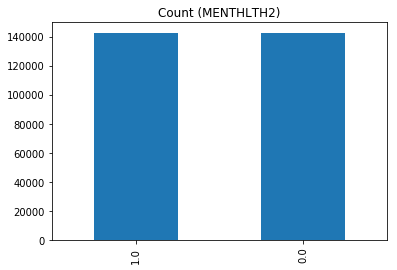

In [29]:
Good_MH_under = Good_MH.sample(count_class_1)
LLCP2_under = pd.concat([Good_MH_under, Poor_MH], axis=0)

print('Random under-sampling:')
print(LLCP2_under.MENTHLTH2.value_counts())

LLCP2_under.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');

### You can see above that we now have an equal amount of observations for both classes of the target MENTHLTH2. We did lose a lot of information using this method, however, we still have a pretty large dataset to work with.

# 2.0 Under-Sampled Model

## Let's re-run the same model now, using the under-sampled data

In [30]:
X_under = LLCP2_under[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','_RFHLTH','_HCVU651','EMPLOY1',
           'VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH']].values

y_under = LLCP2_under['MENTHLTH2'].values

In [31]:
# 70/30 train-test split
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

# describes info about train and test set 
print("Number of rows/columns in X_test_under dataset: ", X_test_under.shape) 
print("Number of rows/columns in y_test_under dataset: ", y_test_under.shape) 
print("Number of rows/columns in X_train_under dataset: ", X_train_under.shape) 
print("Number of rows/columns in y_train_under dataset: ", y_train_under.shape) 

Number of rows/columns in X_test_under dataset:  (85608, 15)
Number of rows/columns in y_test_under dataset:  (85608,)
Number of rows/columns in X_train_under dataset:  (199750, 15)
Number of rows/columns in y_train_under dataset:  (199750,)


In [32]:
# Check the unique counts for the target classes
unique, counts = np.unique(y_train_under, return_counts=True)
dict(zip(unique, counts))

{0.0: 99974, 1.0: 99776}

In [33]:
# ---UNDER-SAMPLED MODEL---

RFC_under = RandomForestClassifier()
RFC_under.fit(X_train_under, y_train_under)
y_pred_under = RFC_under.predict(X_test_under)   #yields predicted class 0/1
probs_under = RFC_under.predict_proba(X_test_under)
probs_under = probs_under[:,1]    #yields probability of either class 0-1

C:\Users\Nick\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


=== Confusion Matrix ===
[[32769  9936]
 [15461 27442]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72     42705
         1.0       0.73      0.64      0.68     42903

   micro avg       0.70      0.70      0.70     85608
   macro avg       0.71      0.70      0.70     85608
weighted avg       0.71      0.70      0.70     85608



Accuracy: 0.7033338005793851
F1_score: 0.683648683997459
Recall_score: 0.6396289303778291
AUC score: 0.7623727393720487
Log Loss: 10.246580330128179
[[32769  9936]
 [15461 27442]]
Sensitivity 0.6396289303778291
Specificity 0.7673340358271865
Precision 0.7341751832628819


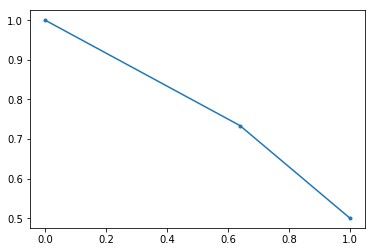

In [34]:
# ---CHECK ACCURACY---

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_under, y_pred_under))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test_under, y_pred_under))
print('\n')
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_under, y_pred_under))
print("F1_score:",metrics.f1_score(y_test_under, y_pred_under))
print("Recall_score:",metrics.recall_score(y_test_under, y_pred_under))
print("AUC score:",metrics.roc_auc_score(y_test_under, probs_under))
print("Log Loss:",metrics.log_loss(y_test_under, y_pred_under, eps=1e-15))
precision, recall, thresholds = metrics.precision_recall_curve(y_test_under, y_pred_under)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(recall, precision, marker='.')
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test_under, y_pred_under)
print(confusion)

# True Positives
TP = confusion[1, 1]
# True Negatives
TN = confusion[0, 0]
# False Positives
FP = confusion[0, 1]
# False Negatives
FN = confusion[1, 0]
print("Sensitivity",TP / float(TP + FN))
print("Specificity",TN / float(TN + FP))
print("Precision",TP / float(TP + FP))

### For this model, the average accuracy score dropped, though the classes are much more balanced. The AUC is similar. This model is better at predicting both classes, which is important. Let's tune the hyper-parameters, to see if we can improve the model further.

# 3. Under-Sampled Model with Hyper-Parameters Tuned (FINAL)

### We'll use RandomizedSearchCV for tuning

In [35]:
# 70/30 split
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

# describes info about train and test set 
print("Number of rows/columns in X_test_final dataset: ", X_test_final.shape) 
print("Number of rows/columns in y_test_final dataset: ", y_test_final.shape) 
print("Number of rows/columns in X_train_final dataset: ", X_train_final.shape) 
print("Number of rows/columns in y_train_final dataset: ", y_train_final.shape) 

Number of rows/columns in X_test_final dataset:  (85608, 15)
Number of rows/columns in y_test_final dataset:  (85608,)
Number of rows/columns in X_train_final dataset:  (199750, 15)
Number of rows/columns in y_train_final dataset:  (199750,)


In [44]:
# Define parameters to be tuned

from sklearn.model_selection import RandomizedSearchCV  
from pprint import pprint

# Number of trees in RFC
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 8)]
# Criterion
criterion = ['gini','entropy']
# Number of features to consider at every split
max_features = ['sqrt',4,5]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False] # Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 4, 5],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800]}


In [37]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
RFC_hyper = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# Search across 50 different combinations, and use 3 available cores (n_jobs)
RFC_hyper = RandomizedSearchCV(estimator = RFC_hyper, param_distributions = random_grid, n_iter = 30, cv = 3, 
                               verbose=1, random_state=42, n_jobs = 3)
# Fit the random search model
RFC_hyper.fit(X_train_final, y_train_final)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed: 33.7min
[Parallel(n_jobs=3)]: Done 150 out of 150 | elapsed: 118.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=3,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 4, 5], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 10, 20], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, 

In [40]:
# Print the best hyper-parameters
RFC_hyper.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 20,
 'max_features': 4,
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': True}

# FINAL MODEL

## Now, we'll adjust the hyper-parameters for the final model

In [49]:
# ---FINAL MODEL with hyper-parameters tuned---

RFC_final = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features='sqrt',
                                   max_depth=10,bootstrap=True, random_state=42)
RFC_final.fit(X_train_final, y_train_final)
y_pred_final = RFC_final.predict(X_test_final)   #yields predicted class 0/1
probs_final = RFC_final.predict_proba(X_test_final)
probs_final = probs_final[:,1]    #yields probability of either class 0-1

=== Confusion Matrix ===
[[33615  9090]
 [13843 29060]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75     42705
         1.0       0.76      0.68      0.72     42903

   micro avg       0.73      0.73      0.73     85608
   macro avg       0.74      0.73      0.73     85608
weighted avg       0.74      0.73      0.73     85608



Accuracy: 0.7321161573684702
F1_score: 0.7170616756936818
Recall_score: 0.6773419108220871
AUC score: 0.8079492035197786
[[33615  9090]
 [13843 29060]]
Sensitivity 0.6773419108220871
Specificity 0.7871443624868283
Precision 0.7617300131061598


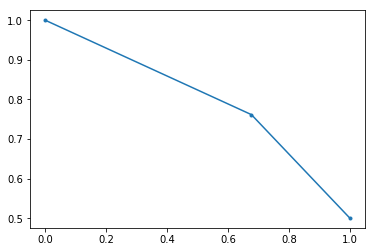

In [50]:
# ---CHECK ACCURACY---

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_final, y_pred_final))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test_final, y_pred_final))
print('\n')
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_final, y_pred_final))
print("F1_score:",metrics.f1_score(y_test_final, y_pred_final))
print("Recall_score:",metrics.recall_score(y_test_final, y_pred_final))
print("AUC score:",metrics.roc_auc_score(y_test_final, probs_final))
precision, recall, thresholds = metrics.precision_recall_curve(y_test_final, y_pred_final)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(recall, precision, marker='.')
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test_final, y_pred_final)
print(confusion)

# True Positives
TP = confusion[1, 1]
# True Negatives
TN = confusion[0, 0]
# False Positives
FP = confusion[0, 1]
# False Negatives
FN = confusion[1, 0]
print("Sensitivity",TP / float(TP + FN))
print("Specificity",TN / float(TN + FP))
print("Precision",TP / float(TP + FP))

### We can see that by tuning the hyper-parameters, we were able to increase average accuracy from 70 to 73% and increased AUC from .76 to .81. 

### Confusion matrix shows that:
#### True positive:    33615     _(We predicted a positive result and it was positive)_
#### True negative:    29060     _(We predicted a negative result and it was negative)_
#### False positive:   9090      _(We predicted a positive result and it was negative)_
#### False negative:   13843     _(We predicted a negative result and it was positive)_

### So, this model makes more correct predictions, than not and the false negative rate seems a bit higher than the false positive

## Now, let's run a ROC plot and get the area under the curve score (AUC)

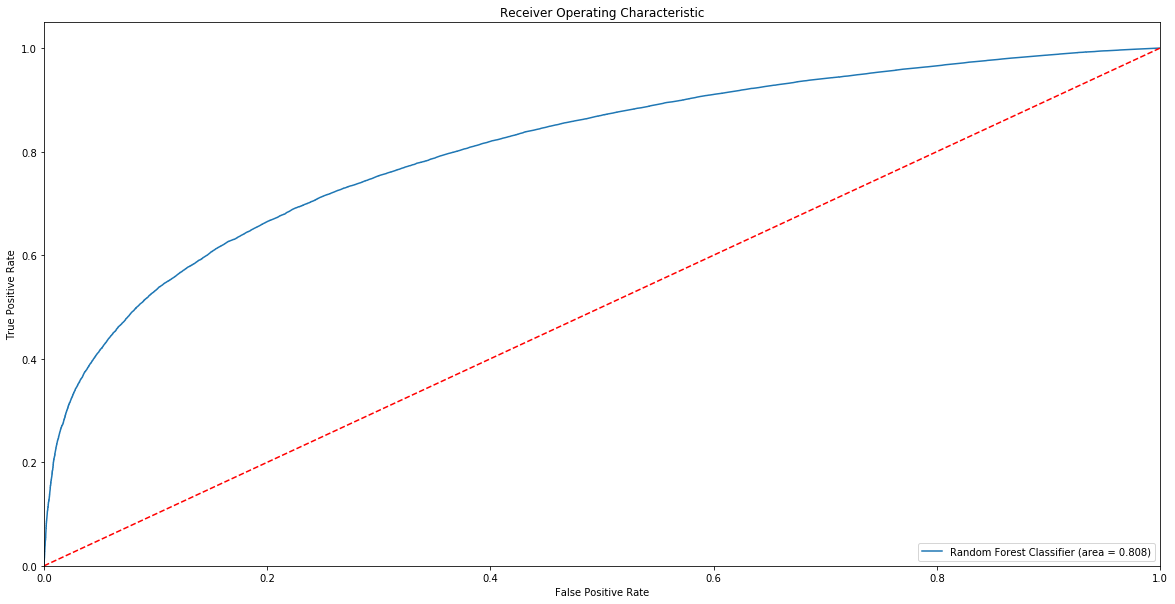

AUC: 0.808


In [51]:
roc_auc = roc_auc_score(y_test_final, probs_final)
fpr, tpr, thresholds = roc_curve(y_test_final, probs_final)
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()
print('AUC: %.3f' % roc_auc)

Feature ranking:
1. feature 12 (0.346118)
2. feature 13 (0.268850)
3. feature 14 (0.160789)
4. feature 1 (0.098508)
5. feature 7 (0.031085)
6. feature 0 (0.018453)
7. feature 9 (0.017653)
8. feature 11 (0.016482)
9. feature 4 (0.013770)
10. feature 10 (0.007897)
11. feature 6 (0.006666)
12. feature 5 (0.003848)
13. feature 2 (0.003602)
14. feature 8 (0.003177)
15. feature 3 (0.003102)


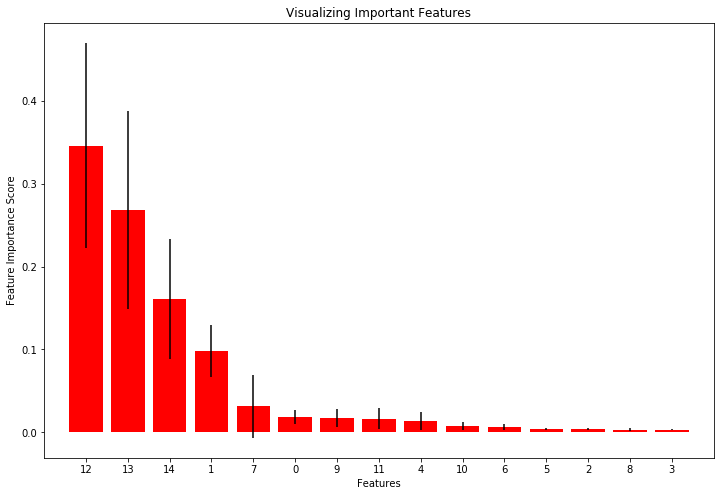

In [53]:
importances = RFC_final.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC_final.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Visualizing Important Features")
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()